### Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh

1. Tạo mô hình dự đoán giá bơ trung bình của Mỹ (sử dụng các thuật toán Regression)

#### 2. Dự đoán giá bơ hữu cơ của vùng California (sử dụng các thuật toán Time Series)

3. Dự đoán giá bơ thường của vùng California (sử dụng mô hình ở câu 1 và 2)

4. Chọn 1 vùng mà bạn cho rằng trong tương lai có thể mở rộng trồng trọt, sản xuất và kinh doanh bơ thường và/hoặc bơ hữu cơ. Hãy chứng minh.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

from sklearn.metrics import *
from math import sqrt

In [4]:
data = pd.read_csv('avocado.csv')
print(data.shape)
data.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df = data[['Date','AveragePrice']][(data['type']=='organic')&(data['region']=='California')]
df.shape

(169, 2)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.reset_index(inplace=True,drop=True)
df.columns = ['ds','y']
df

,ds,y
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11
...,...,...
164,2018-02-25,1.82
165,2018-03-04,1.57
166,2018-03-11,1.58
167,2018-03-18,1.75


In [7]:
df.ds.freq = 'W-SUN'

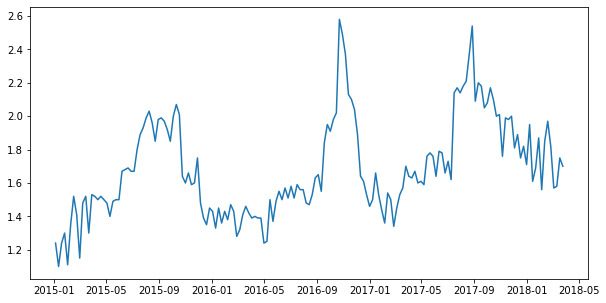

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df['ds'],df['y'])
plt.show()

In [9]:
len(df)*(70/100)

118.3

In [10]:
train,test = df.iloc[:118,:], df.iloc[118:,:]
train.shape, test.shape

((118, 2), (51, 2))

In [11]:
train.tail()

,ds,y
113,2017-03-05,1.45
114,2017-03-12,1.53
115,2017-03-19,1.57
116,2017-03-26,1.70
117,2017-04-02,1.64


In [12]:
test.head()

,ds,y
118,2017-04-09,1.63
119,2017-04-16,1.67
120,2017-04-23,1.60
121,2017-04-30,1.61
122,2017-05-07,1.59


In [13]:
test.tail()

,ds,y
164,2018-02-25,1.82
165,2018-03-04,1.57
166,2018-03-11,1.58
167,2018-03-18,1.75
168,2018-03-25,1.70


In [14]:
model = Prophet().fit(train)
# growth='linear',weekly_seasonality=True,
#                 yearly_seasonality=False,daily_seasonality=False

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.89018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97       271.459    0.00166792       107.316   1.959e-05       0.001      169  LS failed, Hessian reset 
      99       271.505   0.000257934       54.8366      0.3135           1      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       271.554   5.55306e-05       80.4969   7.583e-07       0.001      258  LS failed, Hessian reset 
     199       271.562   1.18397e-05       74.0252      0.4972      0.4972      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       271.822    0.00237777       134.116    2.98e-05       0.001      398  LS failed, Hessian reset 
     299        271.96   0.000348543       80.4221           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

In [15]:
# weeks = pd.date_range('2017-06-11', '2018-03-25',
#                        freq='W-SUN').strftime('%Y-%m-%d').tolist()

# future = pd.DataFrame(weeks)
# future.columns = ['ds']
# future['ds'] = pd.to_datetime(future['ds'])

In [16]:
pre = model.predict(test)
pre.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
result = pre[['ds','yhat']]
result['ytest'] = list(test['y'])
result.set_index('ds',inplace=True)
result

/tmp/ipykernel_2191/2199305292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['ytest'] = list(test['y'])


,yhat,ytest
ds,,
2017-04-09,1.642821,1.63
2017-04-16,1.629483,1.67
2017-04-23,1.619570,1.60
2017-04-30,1.606292,1.61
2017-05-07,1.594627,1.59
2017-05-14,1.606225,1.76
2017-05-21,1.656968,1.78
2017-05-28,1.734330,1.76
2017-06-04,1.803599,1.64


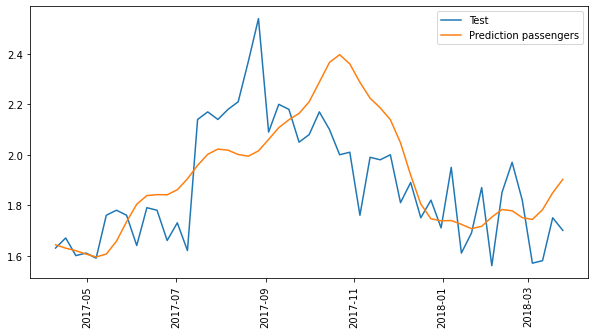

In [18]:
# Visulaize the result
plt.figure(figsize=(10,5))
plt.plot(result['ytest'], label='Test')
plt.plot(result['yhat'], label='Prediction passengers')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

/tmp/ipykernel_2191/498820579.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


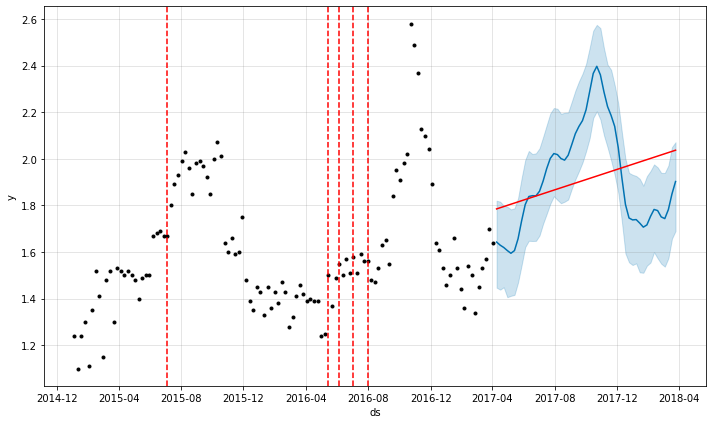

In [19]:
fig = model.plot(pre)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, pre)

/tmp/ipykernel_2191/251967715.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


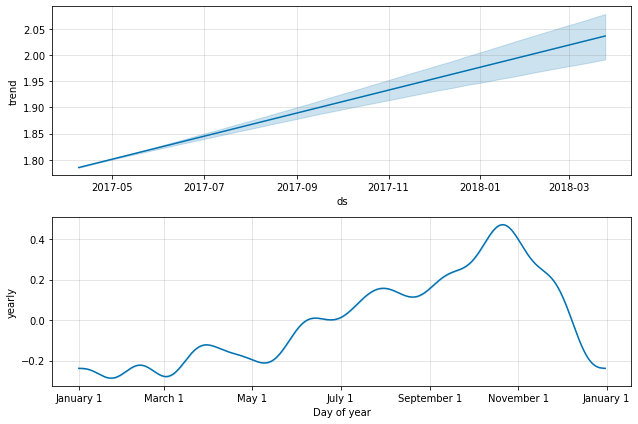

In [20]:
fig1 = model.plot_components(pre)
fig1.show()

In [21]:
mse = mean_squared_error(result['ytest'],result['yhat'])
mae = mean_absolute_error(result['ytest'],result['yhat'])
r2 = r2_score(result['ytest'],result['yhat'])

print('>>> MSE:', mse)
print('>>> MAE:', mae)
print('>>> score:', r2)

>>> MSE: 0.0376683706840809
>>> MAE: 0.15207589306212851
>>> score: 0.2957376256000712


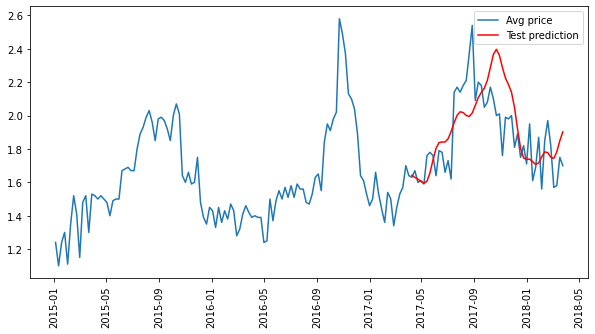

In [22]:
df1 = df.set_index('ds')

plt.figure(figsize=(10,5))
plt.plot(df1.y, label='Avg price')
plt.plot(result['yhat'], color='red',label='Test prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Đánh giá
- Mô hình fbprophet cho ra kết quả tốt hơn so với HoltWinters và ARIMA:
    - MAE, MSE của fbprophet thấp hơn
    - r-score có cải thiện hơn một chút
- Tuy kết quả r-score không cao nhưng dự đoán được xu hướng khá tốt

## Dự đoán giá bơ hữu cơ của vùng California trước 1 năm

In [23]:
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=52,freq='W-SUN') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.44738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       385.203   1.46911e-06        82.914      0.3621      0.3621      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       385.203   1.78974e-08       77.6052           1           1      157   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [24]:
forecast = m.predict(future)
forecast.shape

(221, 16)

In [25]:
print(df.shape)

(169, 2)


In [27]:
forecast[['ds','yhat']][:169]

,ds,yhat
0,2015-01-04,1.393107
1,2015-01-11,1.375394
2,2015-01-18,1.341677
3,2015-01-25,1.323713
4,2015-02-01,1.345679
...,...,...
164,2018-02-25,1.723851
165,2018-03-04,1.683751
166,2018-03-11,1.690114
167,2018-03-18,1.749970


In [28]:
result = forecast[['ds','yhat']][:169]
result['ytest'] = list(df['y'])
result.set_index('ds',inplace=True)
print(result.shape)
result

(169, 2)


,yhat,ytest
ds,,
2015-01-04,1.393107,1.24
2015-01-11,1.375394,1.10
2015-01-18,1.341677,1.24
2015-01-25,1.323713,1.30
2015-02-01,1.345679,1.11
...,...,...
2018-02-25,1.723851,1.82
2018-03-04,1.683751,1.57
2018-03-11,1.690114,1.58


In [29]:
mse = mean_squared_error(result['ytest'],result['yhat'])
mae = mean_absolute_error(result['ytest'],result['yhat'])
r2 = r2_score(result['ytest'],result['yhat'])

print('>>> MSE:', mse)
print('>>> MAE:', mae)
print('>>> score:', r2)

>>> MSE: 0.024079051697898198
>>> MAE: 0.11512123323000144
>>> score: 0.712201573729314


/tmp/ipykernel_2828/3979322814.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


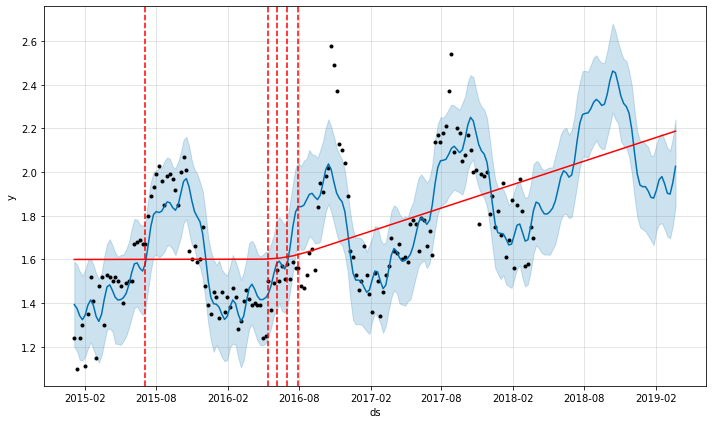

In [23]:
fig = m.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

### Đánh giá
- Mô hình fbprophet sử dụng toàn bộ dữ liệu để train cho ra kết quả tốt hơn rất nhiều với:
    - MSE: 0.024079051697898198
    - MAE: 0.11512123323000144
    - r-score: 0.712201573729314
#### => Xem xét áp dụng mô hình để dự đoán xu hướng, giá bơ năm sau

/tmp/ipykernel_2828/723240099.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


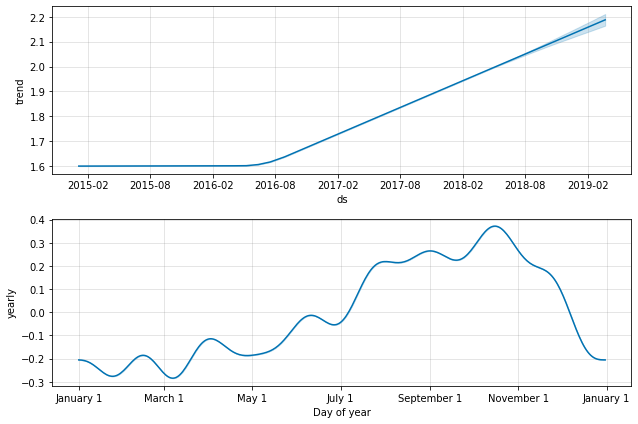

In [24]:
fig1 = m.plot_components(forecast)
fig1.show()

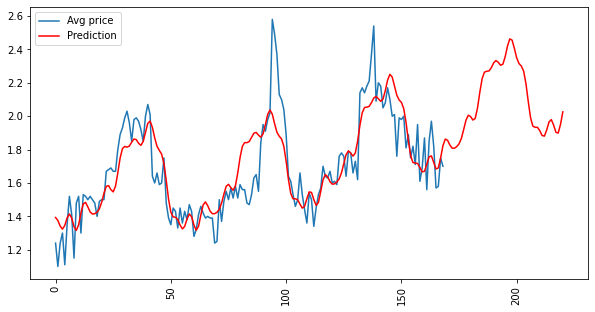

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df.y, label='Avg price')
plt.plot(forecast['yhat'], color='red',
         label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

## Đánh giá tổng thể
- Dữ liệu bất ổn định
- Phương sai dao động
- Giá trị trung bình tăng theo thời gian
- Có biểu hiện theo mùa
- Thuật toán ra kết quả tốt hơn HoltWinters và ARIMA
### => Có thể sử dụng mô hình để dự đoán xu hướng và khoảng giá trung bình thay cho HoltWinters và ARIMA